<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/Genetic_algorithm_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from itertools import product, compress
import time
import pandas as pd
from itertools import compress
import random
import time
import matplotlib.pyplot as plt

data.py

In [2]:
def get_small():
    knapsack = pd.read_csv('knapsack-small.csv')
    return knapsack, 10

def get_big():
    knapsack = pd.read_csv('knapsack-big.csv')
    return knapsack, 6404180

In [4]:
items, knapsack_max_capacity = get_small()
print(items)
print()
print(knapsack_max_capacity)

     Name  Weight  Value
0  Pearls       3      4
1    Gold       7      7
2   Crown       4      5
3    Coin       1      1
4     Axe       5      4
5   Sword       4      3
6    Ring       2      5
7     Cup       3      1

10


In [5]:
#knapsack = pd.read_csv('knapsack-big.csv')
#knapsack.shape

In [6]:
#knapsack = pd.read_csv('knapsack-small.csv')
#knapsack.shape

brute_force.py

In [7]:
def fitness(items, knapsack_max_capacity, solution):
    total_weight = sum(compress(items['Weight'], solution))
    if total_weight > knapsack_max_capacity:
        return 0
    return sum(compress(items['Value'], solution))

#fitnnes zwroci sumę wartosci


items, knapsack_max_capacity = get_small()
#wywołanie funkcji get small

# items zwroci zawartosc, a
# knapsack_max_capacity = zwroci 10 przypisana w funkcji

print(items)

start_time = time.time() #obliczanie czasu funkcji
best_solution = None
best_value = 0
#wszystkie mozliwe kombinacje wyboru elementu  (True - wybrane) False - nie wybrany
#product generuje wszystkie mozliwe kombinacje elementów
for solution in product([False, True], repeat=len(items)):
    solution_value = fitness(items, knapsack_max_capacity, solution)
    if solution_value > best_value:
        best_solution = solution
        best_value = solution_value
end_time = time.time()
total_time = end_time - start_time
print('Best solution:', list(compress(items['Name'], best_solution)))
print('Best solution value:', best_value)
print('Time: ', total_time)

     Name  Weight  Value
0  Pearls       3      4
1    Gold       7      7
2   Crown       4      5
3    Coin       1      1
4     Axe       5      4
5   Sword       4      3
6    Ring       2      5
7     Cup       3      1
Best solution: ['Pearls', 'Crown', 'Coin', 'Ring']
Best solution value: 15
Time:  0.002420663833618164


##Opis compress:

Funkcja compress() wybiera tylko te elementy z jednej listy, które są "skompresowane" lub wybrane przez drugą listę, mającą wartości logiczne True lub False. Jeśli wartość w drugiej liście jest True, to odpowiadający jej element z pierwszej listy jest zachowywany, a jeśli False, to jest pomijany

## Test crossover:

In [8]:
#parent1 = [1, 2, 3, 4, 5]
#parent2 = [6, 7, 8, 9, 10]
#crossover_point = 2

#child1 = parent1[:crossover_point] + parent2[crossover_point:]
#print(child1)

#print("--------------------")
#child2 = parent2[:crossover_point] + parent1[crossover_point:]
#print(child2)

Crossover function

In [9]:
def crossover(parent1, parent2):
  #losowy wybor punktu krzyzowania
  crossover_point = random.randint(1, len(parent1) - 1)# ponieważ tablica iterowana jest od 0

  child1 = parent1[:crossover_point] + parent2[crossover_point:]
  #print(child1)

  #print("--------------------")
  child2 = parent2[:crossover_point] + parent1[crossover_point:]
  #print(child2)
  return child1,child2

Mutation function

In [13]:
def mutation(individual, mutation_rate):
  for i in range(len(individual)):
    #losowy wybór elementu wektora
    if random.random() < mutation_rate:
      #zastąpienie tego elementu jego negacją
      individual[i] = not individual[i] #negacja
  return individual

Selection function

Służy do wyboru najlepszych osobników z populacji na podstawie ich dopasowania (fitness)

In [11]:
def selection(items, knapsack_max_capacity, population, n_selection):

    #population is the list of person which we would like to sort
    # "-" before fitness mean that it would be (sorotwanie malejące XD) descending sort

    #sorted sortuje na podstawie klucza - wartosc ich dopasowania w porządku malejącym
    #return zwraca liczbę osobnikow posrtowana według wartosci ich dopasowania w porzadku malejacym
    # key=lambda individual - klucz sortowania
    return sorted(population, key=lambda individual: -fitness(items, knapsack_max_capacity, individual))

for_students.py

               Name  Weight    Value
0               Axe   32252    68674
1       Bronze coin  225790   471010
2             Crown  468164   944620
3    Diamond statue  489494   962094
4      Emerald belt   35384    78344
5            Fossil  265590   579152
6         Gold coin  497911   902698
7            Helmet  800493  1686515
8               Ink  823576  1688691
9         Jewel box  552202  1056157
10            Knife  323618   677562
11       Long sword  382846   833132
12             Mask   44676    99192
13         Necklace  169738   376418
14       Opal badge  610876  1253986
15            Perls  854190  1853562
16           Quiver  671123  1320297
17        Ruby ring  698180  1301637
18  Silver bracelet  446517   859835
19        Timepiece  909620  1677534
20          Uniform  904818  1910501
21     Venom potion  730061  1528646
22       Wool scarf  931932  1827477
23        Cross bow  952360  2068204
24  Yesteryear book  926023  1746556
25         Zinc cup  978724  2100851
B

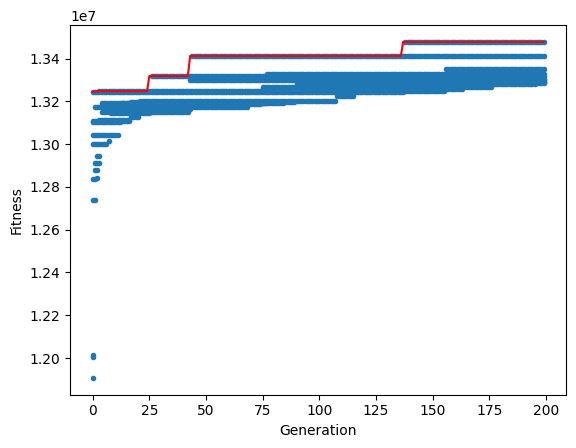

In [14]:
# etap 1
# tworzenie początkowej populacji rozwiązań
def initial_population(individual_size, population_size):
    # elementy w zbiorze dobiera się w sposob losowy
    # Kod generuje listę populacji składającą się z osobników,
    # gdzie każdy osobnik ma określoną liczbę losowo wybranych wartości logicznych True lub False.
    # Proces ten jest powtarzany population_size razy.
    return [[random.choice([True, False]) for _ in range(individual_size)] for _ in range(population_size)]

def fitness(items, knapsack_max_capacity, individual):
    #jesli w individual jest True to zostanie zachowane
    total_weight = sum(compress(items['Weight'], individual))
    if total_weight > knapsack_max_capacity:
        return 0
    return sum(compress(items['Value'], individual))

def population_best(items, knapsack_max_capacity, population):
    best_individual = None
    best_individual_fitness = -1
    for individual in population:
        individual_fitness = fitness(items, knapsack_max_capacity, individual)
        if individual_fitness > best_individual_fitness:
            best_individual = individual
            best_individual_fitness = individual_fitness
    return best_individual, best_individual_fitness


items, knapsack_max_capacity = get_big()
print(items)

mutation_rate = 0.05 #added there

population_size = 100
generations = 200
n_selection = 20
n_elite = 1

start_time = time.time()
best_solution = None
best_fitness = 0
population_history = []
best_history = []
population = initial_population(len(items), population_size)
for _ in range(generations):
    population_history.append(population)

    # TODO: implement genetic algorithm


    # Funkcja selection wybiera najlepszych osobników z populacji na podstawie ich oceny fitness
    # Zwraca listę wybranych osobników

    # Selection
    selected_individuals = selection(items, knapsack_max_capacity, population, n_selection)

    # Crossover
    children = []

    # petla tworząca nowe osobniki w wyniku krzyzowania

    # Liczba iteracji jest obliczana na podstawie rozmiaru populacji minus liczba elit podzielona na 2 (kazde krzyzowanie generuje 2 dzieci)
    for _ in range((population_size - n_elite) // 2):

      parent1 = random.choice(selected_individuals)# losowanie pierwszego rodzica z wybranych osobnikow

      parent2 = random.choice(selected_individuals)# losowanie drugiego rodzica z wybranych osobnikow

      # sprawdzam, czy obaj wylosowani rodzice są tacy sami
      while parent1 == parent2:

        # losuje nowego rodzica aż będą różni
        parent2 = random.choice(selected_individuals)

      # operacja krzyżowania na dwóch wybranych rodzicach, tworząc dwoje dzieci
      child1, child2 = crossover(parent1, parent2)
      # dodawanie nowo utworzonych dzieci do listy dzieci
      children.extend([child1, child2])

    # mutuje kazde dziecko  w celu
    # rozszerzenia przestrzeni poszukiwań
    for child in children:
        mutation(child, mutation_rate)


    # sortuje populację na podstawie oceny fitness każdego osobnika, aby stworzyć nową populacje
    elites = sorted(population, key=lambda individual: fitness(items, knapsack_max_capacity, individual))

    # Łączę elitarnych osobników z dziećmi, tworząc nową populację,
    # która będzie poddawana kolejnym iteracjom algorytmu genetycznego
    population = elites + children



    # znajdowanie najlepszego osobnika w populacji
    best_individual, best_individual_fitness = population_best(items, knapsack_max_capacity, population)
    if best_individual_fitness > best_fitness:
        best_solution = best_individual
        best_fitness = best_individual_fitness
    best_history.append(best_fitness)

end_time = time.time()
total_time = end_time - start_time
print('Best solution:', list(compress(items['Name'], best_solution)))
print('Best solution value:', best_fitness)
print('Time: ', total_time)

# plot generations
x = []
y = []
top_best = 10
for i, population in enumerate(population_history):
    plotted_individuals = min(len(population), top_best)
    x.extend([i] * plotted_individuals)
    population_fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population]
    population_fitnesses.sort(reverse=True)
    y.extend(population_fitnesses[:plotted_individuals])
plt.scatter(x, y, marker='.')
plt.plot(best_history, 'r')
# x -> numer generacji(kolejne iteracje algorytmu genetycznego)
plt.xlabel('Generation')
# y -> wartość fitnness najlepszego osobnika w danej generacji
plt.ylabel('Fitness')
# czerowna kreska na wykresie sledzi postępu algorytmu genetycznego w poszukiwaniu optymalnego rozwiązania
plt.show()